# Setup

In [1]:
base_path = "../"
src_path = base_path+"src/"
exec(open(src_path+"loader.py").read()) # read loader
exec(open(src_path+"loader_transformer.py").read()) # read loader

2022-11-21 12:42:51.853778: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64/mysql-workbench:/usr/lib64/mysql-workbench
2022-11-21 12:42:51.853821: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Prepare Data

In [2]:
def loadDataset(name,level="stroke"):
  file_list = data_path + name +'_train.csv', data_path + name +'_val.csv', data_path + name +'_test.csv'
  train,val,test = getList(file_list)

  print("Preparing Train Data...")
  train_bar = tqdm( train )
  for file_name in train_bar:
    train_bar.set_postfix({'file': file_name})
    
    # # undersampling class text with probability x,xx to add
    # add_data = undersampling(file_name, name)
    # if(not add_data):
    #   continue #skip

    # add data
    data_xy, classes = prepData(file_name, level)
    if 'x_train' in locals():
      x_train = np.append(x_train, data_xy, axis=0)
      y_train = np.append(y_train, classes, axis=0)
    else:
      x_train = data_xy
      y_train = classes


    # # uppersampling class2
    # is_graph = class2(file_name)
    # if (is_graph):
    #   loop = loopCount(file_name, name)
    #   for i in range(loop):
    #     data_xy, classes = prepData(file_name, level, rotate=True)
    #     x_train = np.append(x_train, data_xy, axis=0)
    #     y_train = np.append(y_train, classes, axis=0)



  print("Preparing Validation Data...")
  val_bar = tqdm( val )
  for file_name in val_bar:
    val_bar.set_postfix({'file': file_name})

  #   # undersampling class text with probability x,xx to add
  #   add_data = undersampling(file_name, name)
  #   if(not add_data):
  #     continue #skip

    # add data
    data_xy, classes = prepData(file_name, level)
    if 'x_val' in locals():
      x_val = np.append(x_val, data_xy, axis=0)
      y_val = np.append(y_val, classes, axis=0)
    else:
      x_val = data_xy
      y_val = classes

  #   # uppersampling class2
  #   is_graph = class2(file_name)
  #   if (is_graph):
  #     loop = loopCount(file_name, name)
  #     for i in range(loop):
  #       data_xy, classes = prepData(file_name, level, rotate=True)
  #       x_val = np.append(x_val, data_xy, axis=0)
  #       y_val = np.append(y_val, classes, axis=0)



  print("Preparing Test Data...")
  test_bar = tqdm( test )
  for file_name in test_bar:
    test_bar.set_postfix({'file': file_name})

  #   # undersampling class text with probability x,xx to add
  #   add_data = undersampling(file_name, name)
  #   if(not add_data):
  #     continue #skip

    # add data
    data_xy, classes = prepData(file_name, level)
    if 'x_test' in locals():
      x_test = np.append(x_test, data_xy, axis=0)
      y_test = np.append(y_test, classes, axis=0)
    else:
      x_test = data_xy
      y_test = classes

  #   # uppersampling class2
  #   is_graph = class2(file_name)
  #   if (is_graph):
  #     loop = loopCount(file_name, name)
  #     for i in range(loop):
  #       data_xy, classes = prepData(file_name, level, rotate=True)
  #       x_test = np.append(x_test, data_xy, axis=0)
  #       y_test = np.append(y_test, classes, axis=0)




  data_train = list(zip(x_train, y_train))
  data_val = list(zip(x_val, y_val))
  data_test = list(zip(x_test, y_test))
  
  
  return x_train, y_train, x_val, y_val, x_test, y_test

# 1DCNN + LSTM

In [3]:
dataset = "IAMonDo" # SenseThePen, IAM-OnDB, IAMonDo, all, SenseOnDo
level = "stroke_id"     # stroke_id, word_id, line_id

# load dataset
x_train, y_train, x_val, y_val, x_test, y_test = loadDataset( dataset, level )

Preparing Train Data...


100%|████████████| 565/565 [1:11:56<00:00,  7.64s/it, file=['IAMonDo+/117.csv']]


Preparing Validation Data...


100%|██████████████| 188/188 [24:56<00:00,  7.96s/it, file=['IAMonDo+/110.csv']]


Preparing Test Data...


100%|██████████████| 188/188 [23:23<00:00,  7.47s/it, file=['IAMonDo+/226.csv']]


In [4]:
# print( x_train[0] )
# print( y_train[0] )

In [5]:
# Create Model
def setModel(level):
    # 1DCNN + LSTM
    model = Sequential()
    model.add(keras.Input(shape=(4, lenLevel(level) )))
    model.add(Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1))
    model.add(LSTM(100, return_sequences=True))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])           
    model.summary()
    return model

model = setModel(level)

2022-11-21 14:43:25.958933: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64/mysql-workbench:/usr/lib64/mysql-workbench
2022-11-21 14:43:25.958980: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-21 14:43:25.959019: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (head4): /proc/driver/nvidia/version does not exist
2022-11-21 14:43:25.959542: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 100)            3400      
                                                                 
 lstm (LSTM)                 (None, 2, 100)            80400     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 84,103
Trainable params: 84,103
Non-trainable params: 0
_________________________________________________________________


In [6]:
# class Weight
#class_weight = {0: 0.2420, 1: 2.7103, 2: 1.0} # SenseOnDo Stroke : 179126  16000  43365
#class_weight = {0: 0.5111, 1: 1.0, 2: 4.9699} # SenseThePen Stroke : 13564  6933   1395


# training
#history = model.fit(x_train, y_train, class_weight=class_weight, batch_size=32, epochs=50, validation_data=(x_val, y_val))
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/50


/home/mustafid/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6769/6769 [==============================] - 40s 6ms/step - loss: 0.3174 - accuracy: 0.8714 - val_loss: 0.2832 - val_accuracy: 0.8844
Epoch 2/50
6769/6769 [==============================] - 37s 6ms/step - loss: 0.2784 - accuracy: 0.8850 - val_loss: 0.2659 - val_accuracy: 0.8930
Epoch 3/50
6769/6769 [==============================] - 37s 6ms/step - loss: 0.2614 - accuracy: 0.8927 - val_loss: 0.2606 - val_accuracy: 0.8957
Epoch 4/50
6769/6769 [==============================] - 38s 6ms/step - loss: 0.2520 - accuracy: 0.8963 - val_loss: 0.2618 - val_accuracy: 0.8938
Epoch 5/50
6769/6769 [==============================] - 37s 5ms/step - loss: 0.2448 - accuracy: 0.8994 - val_loss: 0.2591 - val_accuracy: 0.8952
Epoch 6/50
6769/6769 [==============================] - 37s 5ms/step - loss: 0.2391 - accuracy: 0.9022 - val_loss: 0.2551 - val_accuracy: 0.8982
Epoch 7/50
6769/6769 [==============================] - 37s 5ms/step - loss: 0.2337 - accuracy: 0.9045 - val_loss: 0.2536 - val_accuracy: 0.8

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [7]:
# Evaluation
results = model.evaluate(x_test, y_test)
#print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

2190/2190 [==============================] - 5s 2ms/step - loss: 0.2830 - accuracy: 0.8919
Test loss: 0.2830067276954651
Test accuracy: 0.8918887972831726


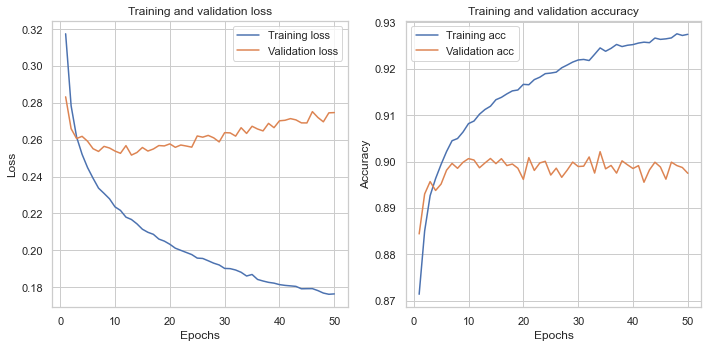

In [8]:
# Visualization
visResult(history)

In [9]:
np.shape(x_test)

(70076, 4, 11)

[[49871     2  2950]
 [    5  3000    67]
 [ 4543     9  9629]]
[[9.44115253e-01 3.78622948e-05 5.58468849e-02]
 [1.62760417e-03 9.76562500e-01 2.18098958e-02]
 [3.20358226e-01 6.34651999e-04 6.79007122e-01]]


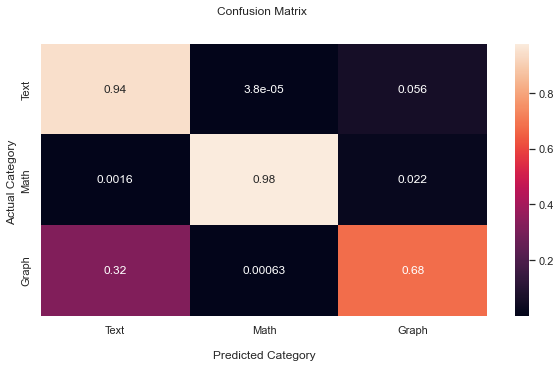

In [10]:
# Confusion Matrix
visConfusionMatrix(model, x_test, y_test)

# Word

Preparing Train Data...


100%|████████████| 565/565 [1:16:54<00:00,  8.17s/it, file=['IAMonDo+/117.csv']]


Preparing Validation Data...


100%|██████████████| 188/188 [24:52<00:00,  7.94s/it, file=['IAMonDo+/110.csv']]


Preparing Test Data...


100%|██████████████| 188/188 [23:36<00:00,  7.53s/it, file=['IAMonDo+/226.csv']]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 100)            13300     
                                                                 
 lstm_1 (LSTM)               (None, 2, 100)            80400     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 94,003
Trainable params: 94,003
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


/home/mustafid/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1661/1661 [==============================] - 11s 6ms/step - loss: 0.2652 - accuracy: 0.8928 - val_loss: 0.2085 - val_accuracy: 0.9175
Epoch 2/50
1661/1661 [==============================] - 10s 6ms/step - loss: 0.2007 - accuracy: 0.9215 - val_loss: 0.1931 - val_accuracy: 0.9240
Epoch 3/50
1661/1661 [==============================] - 11s 6ms/step - loss: 0.1820 - accuracy: 0.9289 - val_loss: 0.1889 - val_accuracy: 0.9252
Epoch 4/50
1661/1661 [==============================] - 10s 6ms/step - loss: 0.1687 - accuracy: 0.9338 - val_loss: 0.1882 - val_accuracy: 0.9261
Epoch 5/50
1661/1661 [==============================] - 10s 6ms/step - loss: 0.1596 - accuracy: 0.9360 - val_loss: 0.1814 - val_accuracy: 0.9276
Epoch 6/50
1661/1661 [==============================] - 10s 6ms/step - loss: 0.1491 - accuracy: 0.9400 - val_loss: 0.1797 - val_accuracy: 0.9303
Epoch 7/50
1661/1661 [==============================] - 10s 6ms/step - loss: 0.1448 - accuracy: 0.9424 - val_loss: 0.1767 - val_accuracy: 0.9

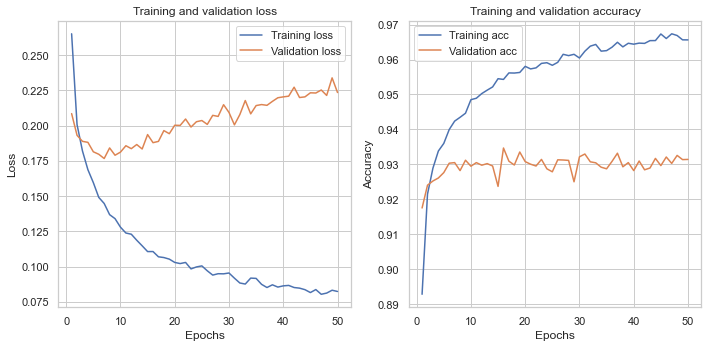

[[12808     3   475]
 [    4   417    22]
 [  654     3  2918]]
[[9.64022279e-01 2.25801596e-04 3.57519193e-02]
 [9.02934537e-03 9.41309255e-01 4.96613995e-02]
 [1.82937063e-01 8.39160839e-04 8.16223776e-01]]


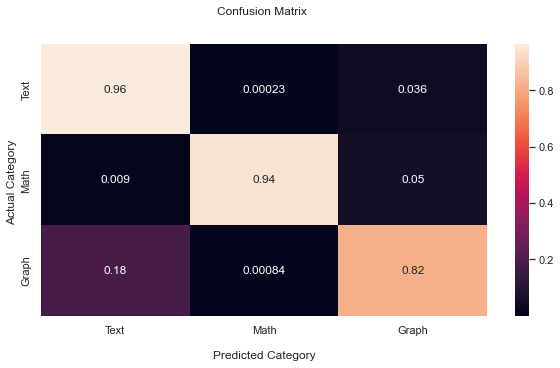

In [11]:
dataset = "IAMonDo" # SenseThePen, IAM-OnDB, IAMonDo, all, SenseOnDo
level = "word_id"     # stroke_id, word_id, line_id

# load dataset
x_train, y_train, x_val, y_val, x_test, y_test = loadDataset( dataset, level )

# Create Model
model = setModel(level)

# training
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

# Evaluation
results = model.evaluate(x_test, y_test)
#print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

# Visualization
visResult(history)

# Confusion Matrix
visConfusionMatrix(model, x_test, y_test)

# Line

Preparing Train Data...


100%|████████████| 565/565 [1:08:00<00:00,  7.22s/it, file=['IAMonDo+/117.csv']]


Preparing Validation Data...


100%|██████████████| 188/188 [23:14<00:00,  7.42s/it, file=['IAMonDo+/110.csv']]


Preparing Test Data...


100%|██████████████| 188/188 [22:12<00:00,  7.09s/it, file=['IAMonDo+/226.csv']]


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 2, 100)            47800     
                                                                 
 lstm_2 (LSTM)               (None, 2, 100)            80400     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 128,503
Trainable params: 128,503
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


/home/mustafid/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


351/351 [==============================] - 4s 8ms/step - loss: 0.3083 - accuracy: 0.8708 - val_loss: 0.2252 - val_accuracy: 0.9162
Epoch 2/50
351/351 [==============================] - 2s 7ms/step - loss: 0.1946 - accuracy: 0.9269 - val_loss: 0.1987 - val_accuracy: 0.9212
Epoch 3/50
351/351 [==============================] - 3s 7ms/step - loss: 0.1590 - accuracy: 0.9439 - val_loss: 0.1898 - val_accuracy: 0.9318
Epoch 4/50
351/351 [==============================] - 2s 7ms/step - loss: 0.1369 - accuracy: 0.9514 - val_loss: 0.1906 - val_accuracy: 0.9283
Epoch 5/50
351/351 [==============================] - 2s 7ms/step - loss: 0.1147 - accuracy: 0.9601 - val_loss: 0.2050 - val_accuracy: 0.9260
Epoch 6/50
351/351 [==============================] - 2s 7ms/step - loss: 0.1024 - accuracy: 0.9643 - val_loss: 0.1868 - val_accuracy: 0.9365
Epoch 7/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0897 - accuracy: 0.9699 - val_loss: 0.1932 - val_accuracy: 0.9362
Epoch 8/50
351/35

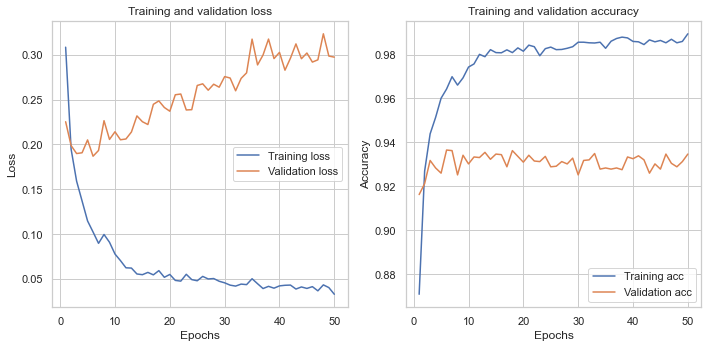

[[2422    1  139]
 [   0   92    1]
 [ 107    1  892]]
[[9.45355191e-01 3.90320062e-04 5.42544887e-02]
 [0.00000000e+00 9.89247312e-01 1.07526882e-02]
 [1.07000000e-01 1.00000000e-03 8.92000000e-01]]


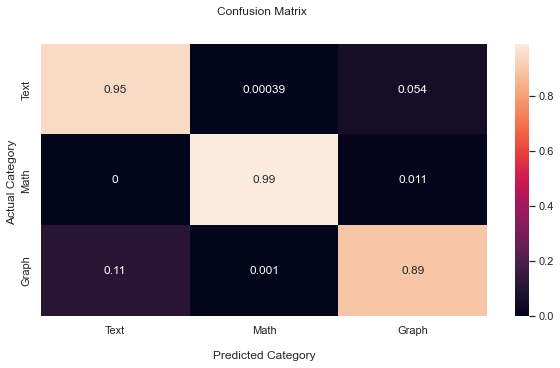

In [12]:
dataset = "IAMonDo" # SenseThePen, IAM-OnDB, IAMonDo, all, SenseOnDo
level = "line_id"     # stroke_id, word_id, line_id

# load dataset
x_train, y_train, x_val, y_val, x_test, y_test = loadDataset( dataset, level )

# Create Model
model = setModel(level)

# training
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

# Evaluation
results = model.evaluate(x_test, y_test)
#print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

# Visualization
visResult(history)

# Confusion Matrix
visConfusionMatrix(model, x_test, y_test)